In [2]:
#Import lybraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [3]:
# Read in the date

df=pd.read_csv(r'C:\Users\Federico Baraldi\Desktop\Corsi\DataAnalysisProject\AlexTheAnalyst\movies.csv')

In [4]:
# Let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} = {}%'.format(col,pct_missing))

name = 0.0%
rating = 0.010041731872717789%
genre = 0.0%
year = 0.0%
released = 0.0002608242044861763%
score = 0.0003912363067292645%
votes = 0.0003912363067292645%
director = 0.0%
writer = 0.0003912363067292645%
star = 0.00013041210224308815%
country = 0.0003912363067292645%
budget = 0.2831246739697444%
gross = 0.02464788732394366%
company = 0.002217005738132499%
runtime = 0.0005216484089723526%


In [6]:
# Data types for our data columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Change data type for column

df['budget'] = df['budget'].fillna(0)
df['budget'] = df['budget'].astype(np.int64)
df['gross'] = df['gross'].fillna(0)
df['gross'] = df['gross'].astype(np.int64)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [8]:
df['released'] = df['released'].astype(str)

In [9]:
df[['releasedDate', 'releasedState']] = df['released'].str.split('(', expand=True)

In [10]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedState
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States)


In [11]:
df['releasedDate'] = pd.to_datetime(df['releasedDate'])

In [12]:
df['yearcorrect'] = df['releasedDate'].dt.year

In [13]:
df['yearcorrect'] = df['yearcorrect'].fillna(0)
df['yearcorrect'] = df['yearcorrect'].astype(np.int64)

In [21]:
db=df.sort_values(by=['gross'], inplace=False, ascending=False)

In [15]:
# pd.set_option('display.max_rows',None)

In [16]:
# Drop any duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedState,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States),1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States),1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States),1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States),1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States),1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020-10-23,United States),2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020-02-07,United States),2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020-04-27,Cameroon),2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020-10-01,United States),2020


In [17]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedState,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States),1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States),1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States),1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States),1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States),1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020-10-23,United States),2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020-02-07,United States),2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020-04-27,Cameroon),2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020-10-01,United States),2020


In [18]:
# Budget high correlation
# Company high correlation

<function matplotlib.pyplot.show(close=None, block=None)>

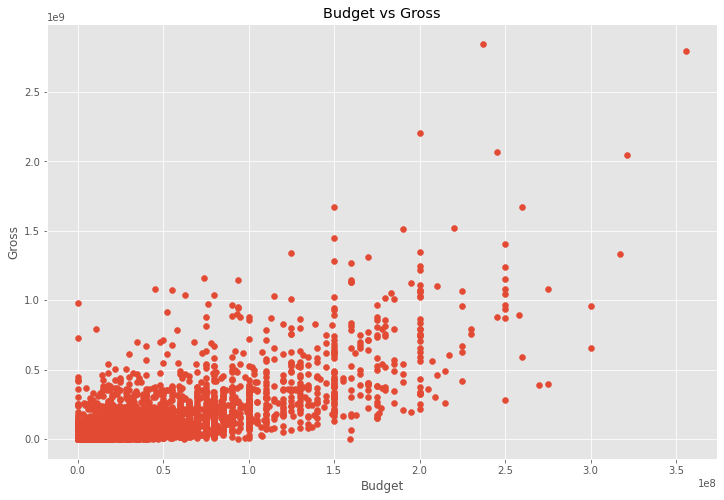

In [20]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show



In [22]:
db.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedState,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,United States),2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,United States),2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,United States),1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,United States),2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,United States),2018


<AxesSubplot:xlabel='budget', ylabel='gross'>

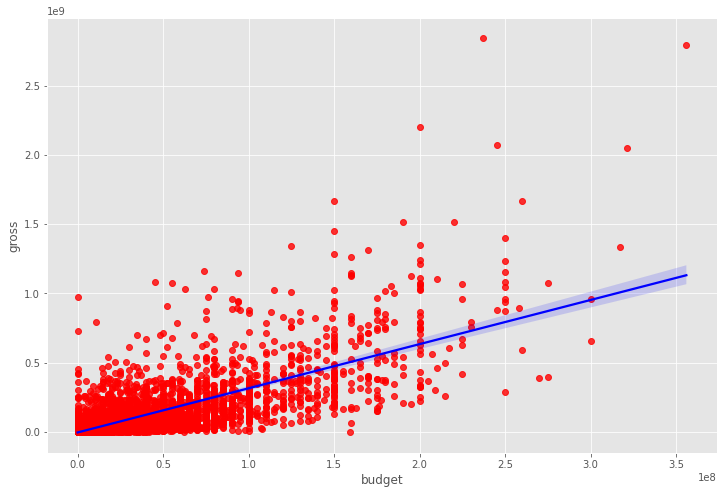

In [24]:
# Budget vs Gross

sns.regplot(x='budget',y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [28]:
# Let's start looking at correlation

df.corr(method='pearson') #pearson, kendal, spearman

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811,0.312521
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451,0.045473
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212,0.070314
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510,0.108069
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235,0.090394
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000,0.120636
yearcorrect,0.312521,0.045473,0.070314,0.108069,0.090394,0.120636,1.000000


In [29]:
df.corr(method='kendall') #pearson, kendal, spearman

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.067652,0.331465,0.209304,0.216595,0.097184,0.986854
score,0.067652,1.000000,0.300115,-0.005194,0.090626,0.283611,0.073699
votes,0.331465,0.300115,1.000000,0.439902,0.560118,0.198240,0.325364
budget,0.209304,-0.005194,0.439902,1.000000,0.541956,0.176016,0.200629
gross,0.216595,0.090626,0.560118,0.541956,1.000000,0.176912,0.206940
runtime,0.097184,0.283611,0.198240,0.176016,0.176912,1.000000,0.096999
yearcorrect,0.986854,0.073699,0.325364,0.200629,0.206940,0.096999,1.000000


In [30]:
df.corr(method='spearman') #pearson, kendal, spearman

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.099045,0.469829,0.291152,0.314681,0.142977,0.996530
score,0.099045,1.000000,0.428138,-0.007500,0.132569,0.399857,0.107995
votes,0.469829,0.428138,1.000000,0.604627,0.752265,0.290159,0.462100
budget,0.291152,-0.007500,0.604627,1.000000,0.716816,0.246748,0.279081
gross,0.314681,0.132569,0.752265,0.716816,1.000000,0.256783,0.300953
runtime,0.142977,0.399857,0.290159,0.246748,0.256783,1.000000,0.142915
yearcorrect,0.996530,0.107995,0.462100,0.279081,0.300953,0.142915,1.000000


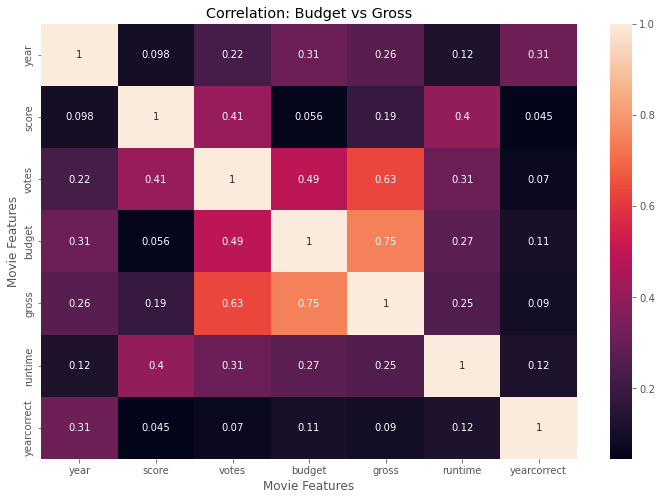

In [34]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation: Budget vs Gross')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [37]:
# Looks at the company

df_numerized=df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedState,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,1980-06-13,56,1980
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,1980-07-02,56,1980
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,1980-06-20,56,1980
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,1980-07-02,56,1980
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,1980-07-25,56,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000,0,-1,90.0,2020-10-23,56,2020
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,0,0,539,90.0,2020-02-07,56,2020
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750,0,941,NaN,2020-04-27,8,2020
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000,0,-1,120.0,2020-10-01,56,2020


In [39]:
df.dtypes

name                      int16
rating                     int8
genre                      int8
year                      int64
released                  int16
score                   float64
votes                   float64
director                  int16
writer                    int16
star                      int16
country                    int8
budget                    int64
gross                     int64
company                   int16
runtime                 float64
releasedDate     datetime64[ns]
releasedState              int8
yearcorrect               int64
dtype: object

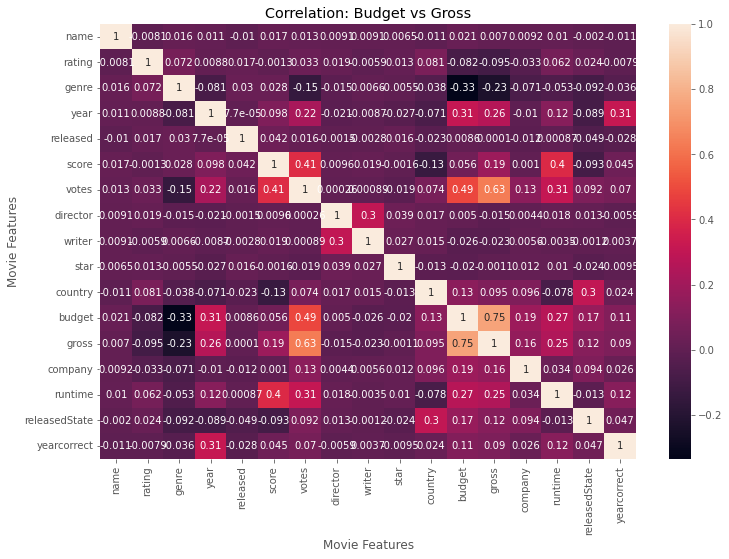

In [40]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation: Budget vs Gross')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [41]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

name         name             1.000000
             rating          -0.008069
             genre            0.016355
             year             0.011453
             released        -0.010480
                                ...   
yearcorrect  gross            0.090394
             company          0.025615
             runtime          0.120636
             releasedState    0.047210
             yearcorrect      1.000000
Length: 289, dtype: float64